In [167]:
import numpy as np
import pandas as pd
import ast
import copy
import re

In [273]:
def fix_data(data):
    for i in range(len(data)):
        if data[i] == '[0 0]':
            tmp = data[i].replace(' ', ',')
            data[i] = tmp

    return data

def fix_data_filter(data):
    for i in range(len(data)):
        tmp = re.sub('\s+',' ',data[i])
        if tmp[1] == ' ':
            tmp = tmp[:1] + '' + tmp[2:]
        if tmp[-2] == ' ':
            tmp = tmp[:-2] + '' + tmp[-1:]
        tmp.replace(' ', ',')
        data[i] = tmp
        tmp = data[i].replace(' ', ',')
        data[i] = tmp
    return data

In [258]:
# import the test data set

df = pd.read_csv('test_data.csv', delimiter=',')

In [303]:
left_eye_raw = fix_data(list(df.iloc[0, 1:]))
right_eye_raw = fix_data(list(df.iloc[1, 1:]))
left_eye_filtered = fix_data_filter(list(df.iloc[2, 1:]))
right_eye_filtered = fix_data_filter(list(df.iloc[3, 1:]))


left_eye_raw = np.array([ast.literal_eval(entry) for entry in left_eye_raw])
right_eye_raw = np.array([ast.literal_eval(entry) for entry in right_eye_raw])
left_eye_filtered = np.array([ast.literal_eval(entry) for entry in left_eye_filtered])
right_eye_filtered = np.array([ast.literal_eval(entry) for entry in right_eye_filtered])


In [304]:
import matplotlib.pyplot as plt
raw_num_points = len(left_eye_raw)
filtered_num_points = len(left_eye_filtered)
t_raw = np.linspace(0,raw_num_points-1, raw_num_points, dtype = int)
t_filtered = np.linspace(0, filtered_num_points-1, filtered_num_points, dtype = int)

conversion = 1/60

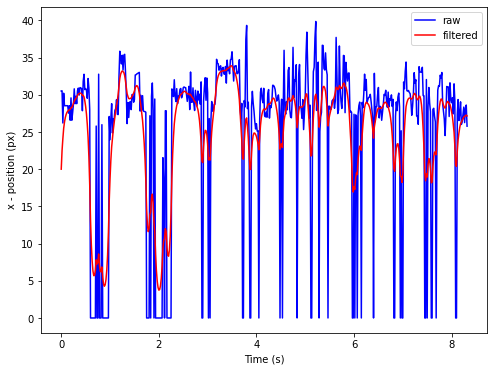

In [318]:
# figure 1: left eye + filtered x-coordinate

left_eye_raw_x = left_eye_raw[:,0]
left_eye_filtered_x = left_eye_filtered[:,0]

plt.figure(figsize=(8, 6))
plt.plot(t_raw*(1/60), left_eye_raw_x, 'b-', label = 'raw')
# plt.plot(t_raw, left_eye_raw_y, 'r-')
plt.plot(t_filtered*(1/60), left_eye_filtered_x, 'r-', label = 'filtered')
plt.xlabel('Time (s)')
plt.ylabel('x - position (px)')
plt.legend()
plt.show()

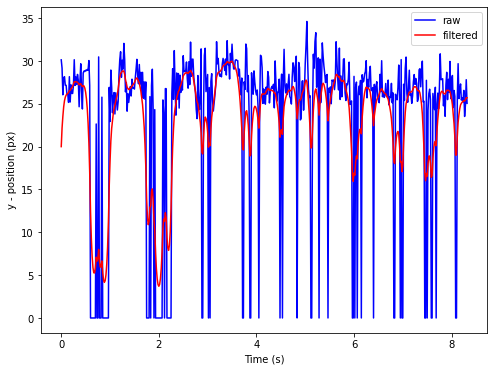

In [320]:
# figure 2: left eye + filtered y-coordinate

left_eye_raw_y = left_eye_raw[:,1]
left_eye_filtered_y = left_eye_filtered[:,2]

plt.figure(figsize=(8, 6))
plt.plot(t_raw*(1/60), left_eye_raw_y, 'b-', label = 'raw')
# plt.plot(t_raw, left_eye_raw_y, 'r-')
plt.plot(t_filtered*(1/60), left_eye_filtered_y, 'r-', label = 'filtered')
plt.xlabel('Time (s)')
plt.ylabel('y - position (px)')
plt.legend()
plt.show()